### Objective:
The objective of this option of the project is to use Multi-Linear Regression (MLR) in order to predict the weight of a fish based off of certain physical aspects like species, length, and height

### Start-Off
to start of let's get a training set and some python packages to help us anylyse data, and cumpute predictions. 

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from random import randint, uniform

In [28]:
data = pd.read_csv("Fish.csv", sep=",") # reads data and saves to variable
print(data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


### What Is Next?
Now that we have the data we need a way to convert the species data from string data into numeric data so we can process it. Insha allah we shall do this by adding another column and with a loop function with conditionals in order to convert every fish's species converted into numeric data.

In [29]:
species_num = [] # numerical array

# loop function individually numerizes each type of fish
for n in range(len(data)): 
    if data["Species"][n] == "Bream":
        species_num.append(1)

    elif  data["Species"][n] == "Roach":
        species_num.append(2)

    elif data["Species"][n] == "Whitefish":
        species_num.append(3)

    elif data["Species"][n] == "Parkki":
        species_num.append(4)

    elif data["Species"][n] == "Perch":
        species_num.append(5)

    elif data["Species"][n] == "Pike":
        species_num.append(6)

    else:
        species_num.append(7)


print(data)


    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


### Variables for our Data
For the X and Y axis for our data we will assign X as all the data in the collums without the 'Weight' or the 'Species' collumn, and Y as the 'Weight' collumn.

In [30]:
X = data.loc[:, "Length3"] # selection of columns for data
Y = data.loc[:,"Weight"]

print(X, Y)

slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(x):
  return slope * x + intercept

data = list(zip(X, Y, species_num))
# print(data)

mymodel = list(map(myfunc, X)) # actuall data for the line
new_x = randint(min(round(X)), max(round(X))) # selects a random X value for our point that will be presented leter
print(new_x)
new_y = myfunc(new_x)
roundY = round(new_y) # bool --> int

0      30.0
1      31.2
2      31.1
3      33.5
4      34.0
       ... 
154    13.4
155    13.5
156    13.8
157    15.2
158    16.2
Name: Length3, Length: 159, dtype: float64 0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64
32


### Matplot better
best

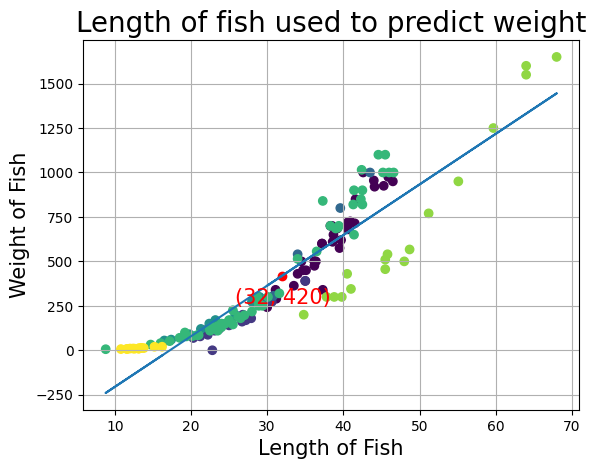

In [31]:
plt.scatter(X, Y, c=species_num)# grades have been colour coded
plt.scatter(new_x, new_y, c='red') # places randomly generated dot on the line to show that it fits with the linear regression model
plt.annotate(f'({new_x}, {roundY})', (new_x, new_y), textcoords="offset points", xytext=(0,-20), ha='center', c='red', fontsize=15) # annotations for graph
plt.plot(X, mymodel) # graphs line
plt.xlabel('Length of Fish', fontsize=15)
plt.ylabel('Weight of Fish', fontsize=15)
plt.title('Length of fish used to predict weight', fontsize=20)
plt.grid()
plt.savefig('main.png')
plt.show()